In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
df = pd.read_csv("train.csv")
df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C


In [155]:
df["Sex"] = df["Sex"].map({"male":int(1),"female":int(2)})
df = df.drop("Name",axis=1)
df = df.drop("Cabin",axis = 1)
df = df.drop("Ticket",axis = 1)

In [156]:
from sklearn.impute import SimpleImputer
Inputer_Model = SimpleImputer().fit(df[["Age"]])

In [157]:
df["Age"] = Inputer_Model.transform(df[["Age"]])
df["Age"] = df["Age"].astype("int64")
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,S
1,2,1,1,2,38,1,0,71.2833,C
2,3,1,3,2,26,0,0,7.9250,S
3,4,1,1,2,35,1,0,53.1000,S
4,5,0,3,1,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,13.0000,S
887,888,1,1,2,19,0,0,30.0000,S
888,889,0,3,2,29,1,2,23.4500,S
889,890,1,1,1,26,0,0,30.0000,C


In [158]:
df["Fare"].isnull().sum().sum()
df["Embarked"] = df["Embarked"].map({"C":int(1),"Q":int(2),"S":int(3)})
Inputer_Model = SimpleImputer().fit(df[["Embarked"]])
df["Embarked"] = Inputer_Model.transform(df[["Embarked"]]).astype("int")
df["Embarked"].sample(20)

451    3
829    2
644    1
741    3
557    1
329    1
797    3
88     3
20     3
796    3
16     2
276    3
141    3
435    3
832    1
12     3
323    3
499    3
234    3
594    3
Name: Embarked, dtype: int64

In [159]:
from sklearn.preprocessing import OneHotEncoder
Encoder_Model = OneHotEncoder().fit(df[["Embarked"]])

In [160]:
df[["Cherbourg","Queenstown","Southampton"]] = Encoder_Model.transform(df[["Embarked"]]).toarray()

In [161]:
df = df.drop("Embarked",axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
0,1,0,3,1,22,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,2,38,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,2,26,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,2,35,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,1,35,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,13.0000,0.0,0.0,1.0
887,888,1,1,2,19,0,0,30.0000,0.0,0.0,1.0
888,889,0,3,2,29,1,2,23.4500,0.0,0.0,1.0
889,890,1,1,1,26,0,0,30.0000,1.0,0.0,0.0


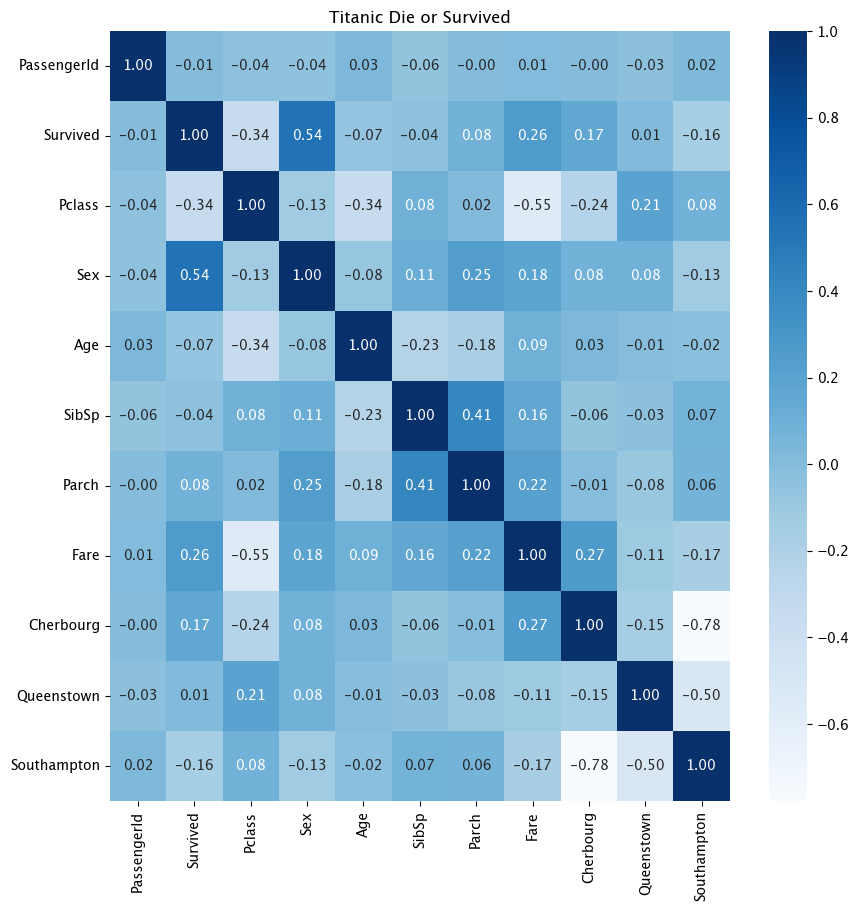

In [162]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.title("Titanic Die or Survived")
sns.heatmap(data = df.corr(),fmt=".2f",cmap="Blues",annot=True)
plt.show()

In [163]:
df["FareBand"],bins= pd.qcut(df["Fare"],4,labels=[0,1,2,3],retbins=True)
df = df.drop("Fare",axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cherbourg,Queenstown,Southampton,FareBand
0,1,0,3,1,22,1,0,0.0,0.0,1.0,0
1,2,1,1,2,38,1,0,1.0,0.0,0.0,3
2,3,1,3,2,26,0,0,0.0,0.0,1.0,1
3,4,1,1,2,35,1,0,0.0,0.0,1.0,3
4,5,0,3,1,35,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,0.0,0.0,1.0,1
887,888,1,1,2,19,0,0,0.0,0.0,1.0,2
888,889,0,3,2,29,1,2,0.0,0.0,1.0,2
889,890,1,1,1,26,0,0,1.0,0.0,0.0,2


In [164]:
df["FamilySize"] = df["SibSp"]+df["Parch"]+1
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cherbourg,Queenstown,Southampton,FareBand,FamilySize
0,1,0,3,1,22,1,0,0.0,0.0,1.0,0,2
1,2,1,1,2,38,1,0,1.0,0.0,0.0,3,2
2,3,1,3,2,26,0,0,0.0,0.0,1.0,1,1
3,4,1,1,2,35,1,0,0.0,0.0,1.0,3,2
4,5,0,3,1,35,0,0,0.0,0.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,0.0,0.0,1.0,1,1
887,888,1,1,2,19,0,0,0.0,0.0,1.0,2,1
888,889,0,3,2,29,1,2,0.0,0.0,1.0,2,4
889,890,1,1,1,26,0,0,1.0,0.0,0.0,2,1


In [165]:
from sklearn.model_selection import train_test_split
x = df.drop("Survived",axis=1)
y = df["Survived"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=87)
print(len(x_train),len(x_test))
print(len(y_train),len(y_test))

712 179
712 179


In [166]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,random_state=87)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [167]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
sorce = accuracy_score(y_test,y_pred)
print(f"{sorce*100:.1f}%")

79.9%
